<a href="https://colab.research.google.com/github/headnotf0und/refactored-octo-rotary-phone/blob/main/Chromebooki_rev_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymcdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 1.0 MB/s eta 0:00:00


In [7]:
import pymcdm as pm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Dane o Chromebookach w formie listy list bez kolumny z nazwą modelu
# Kolejność kolumn: Cena, Przekątna ekranu, Full HD, IPS, RAM, Pojemność pamięci, Qwerty PL, Moc procesora, EOL,
chromebooks = np.array([
    [325, 11, 0, 1, 4, 32, 0, 2436, 2],  # Acer Spin 511
    [259, 11, 0, 1, 4, 32, 0, 1178, 0],  # Acer R11
    [339, 11, 0, 0, 4, 32, 0, 1423, 0],  # ASUS Chromebook C214M
    [300, 14, 1, 0, 8, 64, 0, 2867, 5],  # ASUS CHROMEBOOK C433T
    [309, 14, 1, 0, 8, 64, 0, 1107, 3],  # Asus Chromebook C523N
    [198, 11, 0, 0, 4, 32, 0, 1413, 0],  # Dell Chromebook 11
    [149, 11, 0, 0, 4, 32, 0, 661, 0],   # Dell Chromebook 11 3189
    [199, 11, 0, 0, 4, 32, 0, 1550, 5],  # Dell Chromebook 3100
    [169, 11, 0, 0, 4, 32, 0, 1107, 3],  # Dell Chromebook 5190
    [299, 11, 0, 0, 4, 32, 0, 1987, 5],  # HP 11 G8 EE
    [149, 11, 0, 0, 4, 32, 1, 2436, 5],  # HP Chromebook 11 G8
    [175, 11, 0, 0, 4, 32, 0, 812, 2],   # HP Chromebook 11A G8
    [349, 14, 0, 1, 4, 32, 0, 1031, 5],  # HP Chromebook 14 G4
    [310, 14, 1, 1, 8, 64, 1, 3151, 7],  # HP Chromebook 14b-na0245nd
    [579, 14, 1, 1, 8, 32, 0, 2271, 4],  # HP Chromebook X360 14 G1
    [199, 11, 0, 1, 4, 32, 0, 1550, 5],  # HP Chromebook X360 G3
    [350, 14, 1, 1, 8, 32, 0, 2218, 1],  # HP x360 14 G1
    [599, 14, 1, 0, 8, 64, 0, 3350, 3],  # HP X360 14 G1 i3
    [329, 11, 0, 1, 4, 32, 0, 2436, 5],  # Lenovo Chromebook 300E
    [299, 11, 0, 1, 4, 32, 1, 1986, 5],  # Lenovo Chromebook 500E II
])

# Nazwy Chromebooków
chromebook_names = [
    "Acer Spin 511", "Acer R11", "ASUS Chromebook C214M", "ASUS CHROMEBOOK C433T", "Asus Chromebook C523N",
    "Dell Chromebook 11", "Dell Chromebook 11 3189", "Dell Chromebook 3100", "Dell Chromebook 5190", "HP 11 G8 EE",
    "HP Chromebook 11 G8", "HP Chromebook 11A G8", "HP Chromebook 14 G4", "HP Chromebook 14b-na0245nd", "HP Chromebook X360 14 G1",
    "HP Chromebook X360 G3", "HP x360 14 G1", "HP X360 14 G1 i3", "Lenovo Chromebook 300E", "Lenovo Chromebook 500E II"
]

In [9]:
# Wyświetlenie danych z opisem kolumn
for name, chromebook in zip(chromebook_names, chromebooks):
    print(f"{name}: Cena = {chromebook[0]}, Przekątna ekranu = {chromebook[1]} cali, FHD = {chromebook[2]}, IPS = {chromebook[3]}, RAM = {chromebook[4]} GB, Pojemność pamięci = {chromebook[5]} GB, Klawiatura Qwerty PL = {chromebook[6]}, Moc procesora = {chromebook[7]} MHz, EOL = {chromebook[8]} lata")

# Normalizacja danych
scaler = MinMaxScaler()
chromebooks_normalized = scaler.fit_transform(chromebooks)

# Zdefiniuj wagi dla każdego kryterium
weights = np.array([0.2, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.05])

# Zdefiniuj zysk / strata dla każdego kryterium
types = np.array([-1, -1, 1, 1, 1, 1, 1, 1, 1])   # 1 jako zysk (max), -1 jako koszt (min)

Acer Spin 511: Cena = 325, Przekątna ekranu = 11 cali, FHD = 0, IPS = 1, RAM = 4 GB, Pojemność pamięci = 32 GB, Klawiatura Qwerty PL = 0, Moc procesora = 2436 MHz, EOL = 2 lata
Acer R11: Cena = 259, Przekątna ekranu = 11 cali, FHD = 0, IPS = 1, RAM = 4 GB, Pojemność pamięci = 32 GB, Klawiatura Qwerty PL = 0, Moc procesora = 1178 MHz, EOL = 0 lata
ASUS Chromebook C214M: Cena = 339, Przekątna ekranu = 11 cali, FHD = 0, IPS = 0, RAM = 4 GB, Pojemność pamięci = 32 GB, Klawiatura Qwerty PL = 0, Moc procesora = 1423 MHz, EOL = 0 lata
ASUS CHROMEBOOK C433T: Cena = 300, Przekątna ekranu = 14 cali, FHD = 1, IPS = 0, RAM = 8 GB, Pojemność pamięci = 64 GB, Klawiatura Qwerty PL = 0, Moc procesora = 2867 MHz, EOL = 5 lata
Asus Chromebook C523N: Cena = 309, Przekątna ekranu = 14 cali, FHD = 1, IPS = 0, RAM = 8 GB, Pojemność pamięci = 64 GB, Klawiatura Qwerty PL = 0, Moc procesora = 1107 MHz, EOL = 3 lata
Dell Chromebook 11: Cena = 198, Przekątna ekranu = 11 cali, FHD = 0, IPS = 0, RAM = 4 GB, Pojemn

Ranking początkowy:
HP Chromebook 14b-na0245nd: Miejsce 1.0
ASUS CHROMEBOOK C433T: Miejsce 2.0
HP Chromebook 11 G8: Miejsce 3.0
HP x360 14 G1: Miejsce 4.0
Lenovo Chromebook 500E II: Miejsce 5.0
HP X360 14 G1 i3: Miejsce 6.0
Lenovo Chromebook 300E: Miejsce 7.0
Acer Spin 511: Miejsce 8.0
Asus Chromebook C523N: Miejsce 9.0
HP Chromebook X360 G3: Miejsce 10.0
HP Chromebook X360 14 G1: Miejsce 11.0
Dell Chromebook 3100: Miejsce 12.0
Acer R11: Miejsce 13.0
Dell Chromebook 5190: Miejsce 14.0
Dell Chromebook 11: Miejsce 15.0
HP 11 G8 EE: Miejsce 16.0
Dell Chromebook 11 3189: Miejsce 17.0
HP Chromebook 11A G8: Miejsce 18.0
HP Chromebook 14 G4: Miejsce 19.0
ASUS Chromebook C214M: Miejsce 20.0

Analiza wrażliwości:

Cena:
HP Chromebook 14b-na0245nd: Miejsce 1.0
ASUS CHROMEBOOK C433T: Miejsce 2.0
HP Chromebook 11 G8: Miejsce 3.0
HP Chromebook X360 G3: Miejsce 4.0
Lenovo Chromebook 500E II: Miejsce 5.0
HP x360 14 G1: Miejsce 6.0
Dell Chromebook 3100: Miejsce 7.0
Asus Chromebook C523N: Miejsce 8.0
D

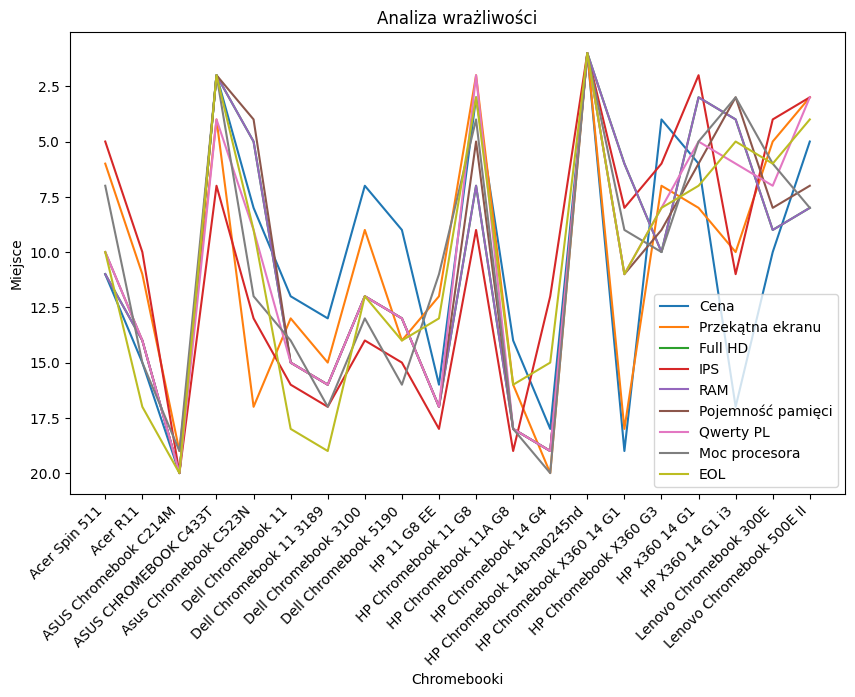

In [10]:
# Inicjalizuj metodę TOPSIS
topsis = pm.methods.TOPSIS()

# Zastosuj metodę TOPSIS
pref = topsis(chromebooks_normalized, weights, types)

# Oceń alternatywy
rank = topsis.rank(pref)

def sensitivity_analysis(chromebooks_normalized, weights, types, topsis_method, weight_change=0.1):
    initial_pref = topsis_method(chromebooks_normalized, weights, types)
    initial_rank = topsis_method.rank(initial_pref)

    sensitivities = []

    for i in range(len(weights)):
        new_weights = weights.copy()
        new_weights[i] += weight_change

        pref = topsis_method(chromebooks, new_weights, types)
        rank = topsis_method.rank(pref)

        sensitivities.append((i, rank))

    return initial_rank, sensitivities

# Przeprowadź analizę wrażliwości
initial_rank, sensitivities = sensitivity_analysis(chromebooks_normalized, weights, types, topsis)

# Lista przyjaznych nazw kryteriów
criteria_names = ["Cena", "Przekątna ekranu", "Full HD", "IPS", "RAM", "Pojemność pamięci", "Qwerty PL", "Moc procesora", "EOL"]

# Wyświetl wyniki analizy wrażliwości
print("Ranking początkowy:")
for r, name in sorted(zip(initial_rank, chromebook_names), key=lambda x: x[0]):
    print(f"{name}: Miejsce {r}")

print("\nAnaliza wrażliwości:")
for idx, ranks in sensitivities:
    print(f"\n{criteria_names[idx]}:")
    for r, name in sorted(zip(ranks, chromebook_names), key=lambda x: x[0]):
        print(f"{name}: Miejsce {r}")

# Wykresy wrażliwości
plt.figure(figsize=(10, 6))
for idx, ranks in sensitivities:
    plt.plot(ranks, label=criteria_names[idx])
plt.legend()
plt.xlabel('Chromebooki')
plt.ylabel('Miejsce')
plt.title('Analiza wrażliwości')
plt.gca().invert_yaxis()
# Ustawienie etykiet osi x
plt.xticks(ticks=np.arange(len(chromebook_names)), labels=chromebook_names, rotation=45, ha='right')
plt.show()

